In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [3]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [4]:
# function to download all listings data
def get_listings_barcelona_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Barcelona')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/barcelona_{date}.csv',index=False)
get_listings_barcelona_timeseries()

In [5]:
# pull in detailed_listings
raw_df_barcelona = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_barcelona)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(barcelona_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 16055 AirBnb listings.


In [6]:
barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2020-12.csv')
barcelona_raw_df_12_12_2020.shape





(19641, 16)

In [7]:
# use magic commands 'cd' to change directory
# use glob to locate all files for barcelona
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_barcelona = glob.glob('barcelona/**.csv')
files_barcelona

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['barcelona/Barcelona_2020-12.csv',
 'barcelona/Barcelona_2021-08.csv',
 'barcelona/Barcelona_2021-09.csv',
 'barcelona/Barcelona_2021-01.csv',
 'barcelona/Barcelona_2021-02.csv',
 'barcelona/Barcelona_2021-03.csv',
 'barcelona/Barcelona_2021-07.csv',
 'barcelona/Barcelona_2021-06.csv',
 'barcelona/Barcelona_2021-04.csv',
 'barcelona/Barcelona_2021-10.csv',
 'barcelona/Barcelona_2021-05.csv']

In [8]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(barcelona_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(barcelona_raw_df_12_12_2020['price'].mean(),2)}.")

barcelona_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(barcelona_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_1_9_2021['price'].mean(),2)}.")

barcelona_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(barcelona_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_2_8_2021['price'].mean(),2)}.")

barcelona_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(barcelona_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_3_4_2021['price'].mean(),2)}.")

barcelona_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(barcelona_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_4_9_2021['price'].mean(),2)}.")

barcelona_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(barcelona_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_5_19_2021['price'].mean(),2)}.")

barcelona_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(barcelona_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_6_3_2021['price'].mean(),2)}.")

barcelona_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(barcelona_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_7_4_2021['price'].mean(),2)}.")

barcelona_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(barcelona_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_8_6_2021['price'].mean(),2)}.")

barcelona_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(barcelona_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_9_7_2021['price'].mean(),2)}.")

barcelona_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(barcelona_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_10_6_2021['price'].mean(),2)}.")

#barcelona_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/barcelona/barcelona_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(barcelona_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 19641 AirBnb listings; the avg price is €91.91.
The 1_9_2021 dataset contains 18569 AirBnb listings; the avg price is €103.39.
The 2_8_2021 dataset contains 18471 AirBnb listings; the avg price is €103.76.
The 3_4_2021 dataset contains 18286 AirBnb listings; the avg price is €106.15.
The 4_9_2021 dataset contains 18226 AirBnb listings; the avg price is €110.39.
The 5_19_2021 dataset contains 17663 AirBnb listings; the avg price is €111.69.
The 6_3_2021 dataset contains 17589 AirBnb listings; the avg price is €111.72.
The 7_4_2021 dataset contains 17079 AirBnb listings; the avg price is €115.01.
The 8_6_2021 dataset contains 16554 AirBnb listings; the avg price is €115.96.
The 9_7_2021 dataset contains 16206 AirBnb listings; the avg price is €109.26.
The 10_6_2021 dataset contains 16055 AirBnb listings; the avg price is €112.47.


In [9]:
df_list_barcelona = [barcelona_raw_df_12_12_2020, barcelona_raw_df_1_9_2021, barcelona_raw_df_2_8_2021,
           barcelona_raw_df_3_4_2021, barcelona_raw_df_4_9_2021, barcelona_raw_df_5_19_2021, barcelona_raw_df_6_3_2021, barcelona_raw_df_7_4_2021,
           barcelona_raw_df_8_6_2021, barcelona_raw_df_9_7_2021, barcelona_raw_df_10_6_2021]

dates_barcelona = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_barcelona = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_barcelona = []

def airbnb_parse_barcelona(df_list, files):
    for file in files_barcelona:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_{file}.csv")
        print(f"The {file} barcelona dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_barcelona(df_list, dates):
    for file in files_barcelona:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_barcelona.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_barcelona)

barcelona_parse = airbnb_parse_barcelona(df_list_barcelona, files_barcelona)


The 2020-12 barcelona dataset contains 19641 AirBnb listings -- the avg price is €91.91.
The 2021-01 barcelona dataset contains 18569 AirBnb listings -- the avg price is €103.39.
The 2021-02 barcelona dataset contains 18471 AirBnb listings -- the avg price is €103.76.
The 2021-03 barcelona dataset contains 18286 AirBnb listings -- the avg price is €106.15.
The 2021-04 barcelona dataset contains 18226 AirBnb listings -- the avg price is €110.39.
The 2021-05 barcelona dataset contains 17663 AirBnb listings -- the avg price is €111.69.
The 2021-06 barcelona dataset contains 17589 AirBnb listings -- the avg price is €111.72.
The 2021-07 barcelona dataset contains 17079 AirBnb listings -- the avg price is €115.01.
The 2021-08 barcelona dataset contains 16554 AirBnb listings -- the avg price is €115.96.
The 2021-09 barcelona dataset contains 16206 AirBnb listings -- the avg price is €109.26.
The 2021-10 barcelona dataset contains 16055 AirBnb listings -- the avg price is €112.47.


In [10]:
barcelona_summary = airbnb_to_frame_barcelona(df_list_barcelona, files_barcelona)
barcelona_summary['Date of scrape'] = pd.to_datetime(barcelona_summary['Date of scrape'])
barcelona_summary['City'] = 'barcelona'
barcelona_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,19641,91.91,55.0,0,11500,1.01,barcelona
1,2021-01-01,18569,103.39,53.0,0,11500,0.99,barcelona
2,2021-02-01,18471,103.76,54.0,0,11500,0.96,barcelona
3,2021-03-01,18286,106.15,55.0,0,11500,0.94,barcelona
4,2021-04-01,18226,110.39,55.0,0,11500,0.92,barcelona
5,2021-05-01,17663,111.69,60.0,0,10045,0.91,barcelona
6,2021-06-01,17589,111.72,60.0,0,10045,0.99,barcelona
7,2021-07-01,17079,115.01,69.0,0,9999,1.01,barcelona
8,2021-08-01,16554,115.96,70.0,0,9999,1.08,barcelona
9,2021-09-01,16206,109.26,70.0,0,9999,1.16,barcelona


In [11]:
master_df_barcelona = pd.concat(df_list_barcelona)
master_df_barcelona_unique = master_df_barcelona.drop_duplicates(subset='id')
master_df_barcelona_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37973,2.17631,Private room,80,3,2,2017-11-06,0.05,3,134,NaN,NaN
1,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,183,3,52,2019-12-15,0.44,2,320,NaN,NaN
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,98,2,63,2020-02-22,0.55,5,0,NaN,NaN
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,46,30,8,2013-07-15,0.06,3,0,NaN,NaN
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,183,4,149,2020-03-11,1.20,3,67,NaN,NaN


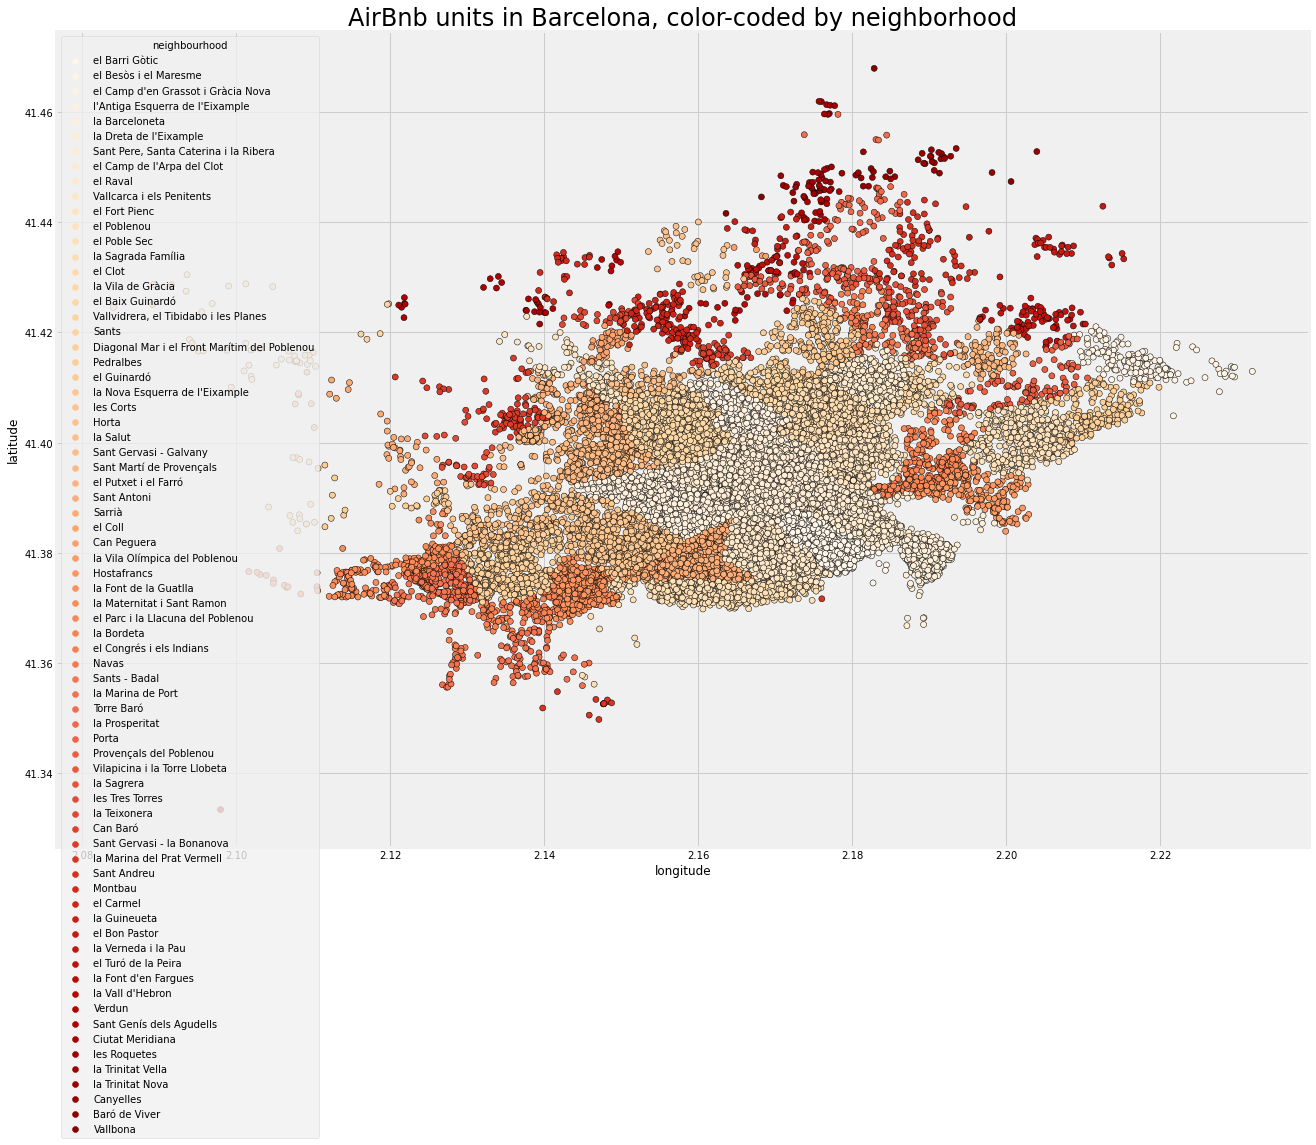

In [12]:
title = 'AirBnb units in Barcelona, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_barcelona_unique.longitude, master_df_barcelona_unique.latitude, hue = master_df_barcelona_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_barcelona.png')
plt.show()

## Add review data through a join

In [13]:
df_reviews = pd.concat([barcelona_raw_df_10_6_2021,raw_df_barcelona],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404200,2.17306,Entire home/apt,121,...,4.55,4.75,4.80,4.90,4.75,4.30,t,19,0,0
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412910,2.22063,Entire home/apt,220,...,4.92,4.92,4.94,4.98,4.67,4.69,f,2,0,0
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,144,...,4.27,4.38,4.81,4.79,4.81,4.40,t,3,0,0
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,181,...,4.66,4.62,4.66,4.67,4.73,4.48,f,2,0,0
4,35379,Double 04 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.390360,2.15274,Private room,41,...,4.83,4.65,4.92,4.93,4.77,4.74,t,0,4,0
5,35388,Single 01 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.390650,2.15196,Private room,31,...,4.84,4.76,4.90,4.92,4.71,4.78,t,0,4,0
6,35390,Single 02 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.390470,2.15263,Private room,31,...,4.92,4.82,4.93,4.91,4.85,4.83,t,0,4,0
7,35392,Double 03 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.390820,2.15078,Private room,46,...,4.87,4.67,4.96,4.94,4.80,4.79,t,0,4,0
8,36763,In front of the beach,158596,Ester,Ciutat Vella,la Barceloneta,41.380430,2.19094,Private room,36,...,4.82,4.72,4.91,4.89,4.91,4.75,f,0,1,0
9,40983,Classical loft close to pedrera!,177617,Joaquin,Eixample,la Dreta de l'Eixample,41.396310,2.16832,Entire home/apt,43,...,4.42,4.37,4.75,4.76,4.86,4.33,f,3,3,0


## Regression

In [14]:
#df_reviews_.columns

In [15]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [16]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -51.76071278594088
Coefficients:  [20.17544144  8.10370132  1.18881709  0.34296681 -2.33220279  4.63490972
 14.94491241 -2.32375499 -0.43157797]
LinearRegression()


In [17]:
y_pred2 = regr.predict(X_)

In [18]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
7225,400,74.694674,-325.305326
12388,400,75.037640,-324.962360
3070,389,64.346069,-324.653931
13354,400,86.863658,-313.136342
8630,396,92.469347,-303.530653


<function matplotlib.pyplot.ylim(*args, **kwargs)>

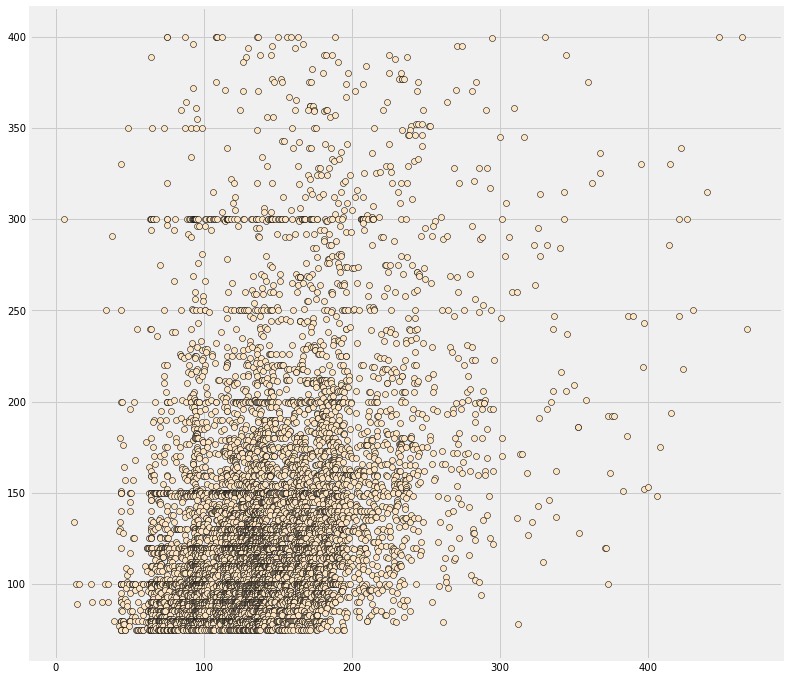

In [20]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(12,12))
plt.scatter(x,y, edgecolor='black')
plt.ylim